<h1> ACTIVITY1 - PALMER PENGUINS DATA ANALYTICS PROJECT </h1>
<hr>

<h3> ANALYST: Mark Angelo Salazar </h3>

In [96]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings ('ignore')
import matplotlib.pyplot as plt

In [52]:
peng = pd.read_csv('datasets\\penguins.csv')

In [53]:
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
peng.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


<h2>FILTERING A COLUMN/DATA</h2>

In [6]:
peng['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [7]:
peng['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [8]:
peng[(peng['bill_depth_mm'] <= 20) & (peng['sex'] == 'torgersen')]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


<h1>Cleaning The Data Frame</h1>

In [9]:
peng.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<h1>Whate to do with the null values?</h1>

In [10]:
peng['bill_length_mm'].mean()

43.9219298245614

In [11]:
peng['sex'].mode()

0    MALE
Name: sex, dtype: object

<h1>How to fillup null values?</h1>

In [12]:
peng['bill_length_mm'] = peng['bill_length_mm'].fillna(peng['bill_length_mm'].mean())

In [13]:
peng.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [14]:
peng['bill_depth_mm'] = peng['bill_depth_mm'].fillna(peng['bill_depth_mm'].mean())

In [15]:
peng.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [16]:
peng['flipper_length_mm'] = peng['flipper_length_mm'].fillna(peng['flipper_length_mm'].mean())

In [17]:
peng.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           2
sex                  11
dtype: int64

In [18]:
peng['body_mass_g'] = peng['body_mass_g'].fillna(peng['body_mass_g'].mean())

In [19]:
peng.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [20]:
peng['sex'] = peng['sex'].fillna(peng['sex'].mode()[0])

In [21]:
peng.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [22]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [23]:
peng.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [24]:
peng['species'] = peng['species'].astype('category')

In [25]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    object  
 2   bill_length_mm     344 non-null    float64 
 3   bill_depth_mm      344 non-null    float64 
 4   flipper_length_mm  344 non-null    float64 
 5   body_mass_g        344 non-null    float64 
 6   sex                344 non-null    object  
dtypes: category(1), float64(4), object(2)
memory usage: 16.7+ KB


In [26]:
peng['island'] = peng['island'].astype('category')

In [27]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     344 non-null    float64 
 3   bill_depth_mm      344 non-null    float64 
 4   flipper_length_mm  344 non-null    float64 
 5   body_mass_g        344 non-null    float64 
 6   sex                344 non-null    object  
dtypes: category(2), float64(4), object(1)
memory usage: 14.5+ KB


In [28]:
peng['sex'] = peng['sex'].astype('category')

In [29]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     344 non-null    float64 
 3   bill_depth_mm      344 non-null    float64 
 4   flipper_length_mm  344 non-null    float64 
 5   body_mass_g        344 non-null    float64 
 6   sex                344 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


<h1>EXPLORATORY DATA ANALYSIS (EDA)</h1>

<h3>1.Which specie of penguin amongst the data set is the heaviest?</h3>

In [30]:
peng['body_mass_g'].mean()

4201.754385964912

In [31]:
peng['species'] == "Adelie"

0       True
1       True
2       True
3       True
4       True
       ...  
339    False
340    False
341    False
342    False
343    False
Name: species, Length: 344, dtype: bool

In [32]:
peng['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [33]:
peng[peng['species'] == "Adelie"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.60000,18.40000,184.000000,3475.000000,FEMALE
148,Adelie,Dream,36.00000,17.80000,195.000000,3450.000000,FEMALE
149,Adelie,Dream,37.80000,18.10000,193.000000,3750.000000,MALE
150,Adelie,Dream,36.00000,17.10000,187.000000,3700.000000,FEMALE


In [34]:
adelie_df = peng[peng['species'] == "Adelie"]

In [35]:
adelie_df['body_mass_g'].mean()

3703.95891043398

In [36]:
peng[peng['species'] == "Adelie"]['body_mass_g'].mean()

3703.95891043398

<h5>Insight: Gentoo is the heviest penguin specie.<h5/>

<h3>2.Which island has the heaviest species?</h3>

In [101]:
peng['island'].mean

<bound method Series.mean of 0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object>

<h3>3.Which island has the largest average of penguin body mass?</h3>

In [39]:
island_bmass = peng.groupby(['island'])['body_mass_g'].mean()


In [40]:
island_bmass

island
Biscoe       4712.956871
Dream        3712.903226
Torgersen    3715.899123
Name: body_mass_g, dtype: float64

<h5>INSIGHT: Biscoe has the largest average of penguin body mass.</h5>

<h3>4.What is the average body mass of each male Species?</h3>

In [41]:
male_bodymass = peng.groupby(['species','sex'])['body_mass_g'].mean()

In [42]:
male_bodymass

species    sex   
Adelie     FEMALE    3368.835616
           MALE      4013.629802
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5411.011430
Name: body_mass_g, dtype: float64

<h5>INSIGHT: Male adelie specie has 4014 g and for male chinstrap its wieght is 3939 g, lastly male gentoo has 5411 g.</h5>

<h3>5.Is there a correlation between flipper length and weight?

In [43]:
flipper_mass_corr = peng['bill_depth_mm'].corr(peng["body_mass_g"])

In [44]:
flipper_mass_corr

-0.4719156211860666

<h5>INSIGHT: There is a correlation between flipper length and weight of penguins.</h5>

<h3>6.Which penguin species has the largest average bill length?

In [104]:
largest_bill_length = peng.groupby('species')['bill_length_mm'].mean()

In [105]:
largest_bill_length

species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: bill_length_mm, dtype: float64

<h5>INSIGHT: Chinstrap has the largest bill length.</h5>

<h3>7.What is the average bill length of penguins by island?</h3>

In [47]:
island_bill_length = peng.groupby('island')['bill_length_mm'].mean()

In [48]:
island_bill_length

island
Biscoe       45.249535
Dream        44.167742
Torgersen    39.046576
Name: bill_length_mm, dtype: float64

<h5>INSIGHT: The average bill length of penguins in biscoe is 45 mm, and in dream is 44 mm, lastly in torgersen which is 39 mm.</h5>

<h3>8.Which island has the heaviest specie?</h3>

In [49]:
island_heaviest_specie = peng.groupby(['island','species'])['body_mass_g'].mean()

In [50]:
island_heaviest_specie

island     species  
Biscoe     Adelie       3709.659091
           Chinstrap            NaN
           Gentoo       5068.965761
Dream      Adelie       3688.392857
           Chinstrap    3733.088235
           Gentoo               NaN
Torgersen  Adelie       3715.899123
           Chinstrap            NaN
           Gentoo               NaN
Name: body_mass_g, dtype: float64

<h5>INSIGHT: Biscoe island has the heaviest specie and it is gentoo.</h5>

<h3>9.Is male penguin heavier then female penguin?</h3>

In [57]:
weight_sex=peng.groupby("sex")["body_mass_g"].mean()

In [58]:
weight_sex

sex
FEMALE    3862.272727
MALE      4545.684524
Name: body_mass_g, dtype: float64

<h5>INSIGHT: Male is Heavier than female</h5>

<h3>10. Which island has the most penguins?</h3>

In [59]:
island = peng["island"].value_counts()

In [60]:
island

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

<h5>INSIGHT: Biscoe Has the largest penguin population</h5>

<h3>11. Who has the longer flippers among male and female species?</h3>

In [66]:
male_female_flength = peng.groupby(["species","sex"])["flipper_length_mm"].mean()

In [67]:
male_female_flength

species    sex   
Adelie     FEMALE    187.794521
           MALE      192.410959
Chinstrap  FEMALE    191.735294
           MALE      199.911765
Gentoo     FEMALE    212.706897
           MALE      221.540984
Name: flipper_length_mm, dtype: float64

<h5>INSIGHT: In all penguin species male has the longer flipper than male</h5>

<h3>12. Which specie has the longest average flipper length?</h3>

In [83]:
flength = peng.groupby("species")[("flipper_length_mm")].mean()

In [84]:
flength

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

<h5>INSIGHT: Gentoo has the longest flipper</h5>

In [85]:
penguin_count = peng["species"].value_counts()

In [86]:
penguin_count

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [87]:
penguin_count.values

array([152, 124,  68], dtype=int64)

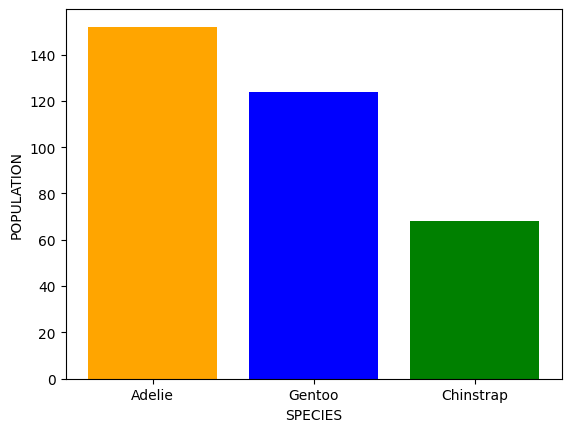

In [91]:
plt.bar(penguin_count.index,penguin_count.values, color=["orange","blue","green"])
plt.xlabel("SPECIES")
plt.ylabel("POPULATION")
plt.show()